# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [33]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns




from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [5]:
df=pd.read_csv('census income report')

In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.shape

(32560, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()#

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isnull().sum()# there is no null values in the dataset.

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [15]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
df.loc[df.Native_country=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [17]:
df.loc[df.Occupation=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


# Data Visualization

<AxesSubplot:>

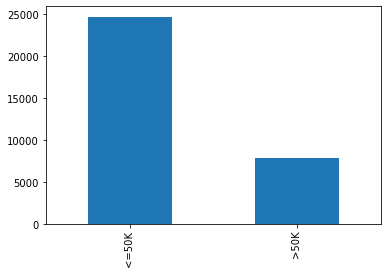

In [18]:
df['Income'].value_counts().plot(kind='bar')

In [ ]:
As per above visualization of target we can see the ration is imbalanced

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

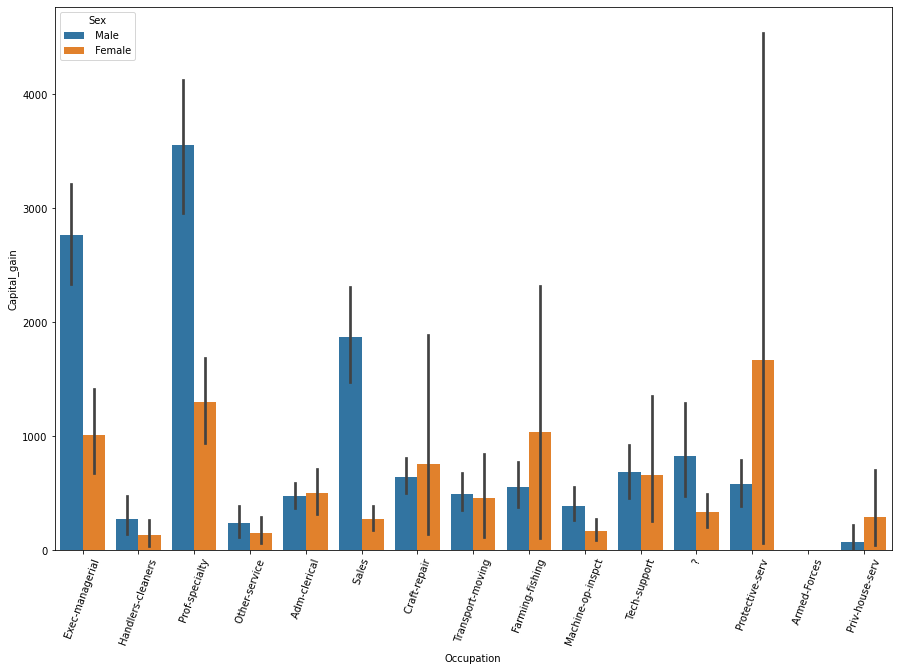

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Sex')
plt.xticks(rotation=70)

In [ ]:
#above data we can see that protective service female taking lead

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

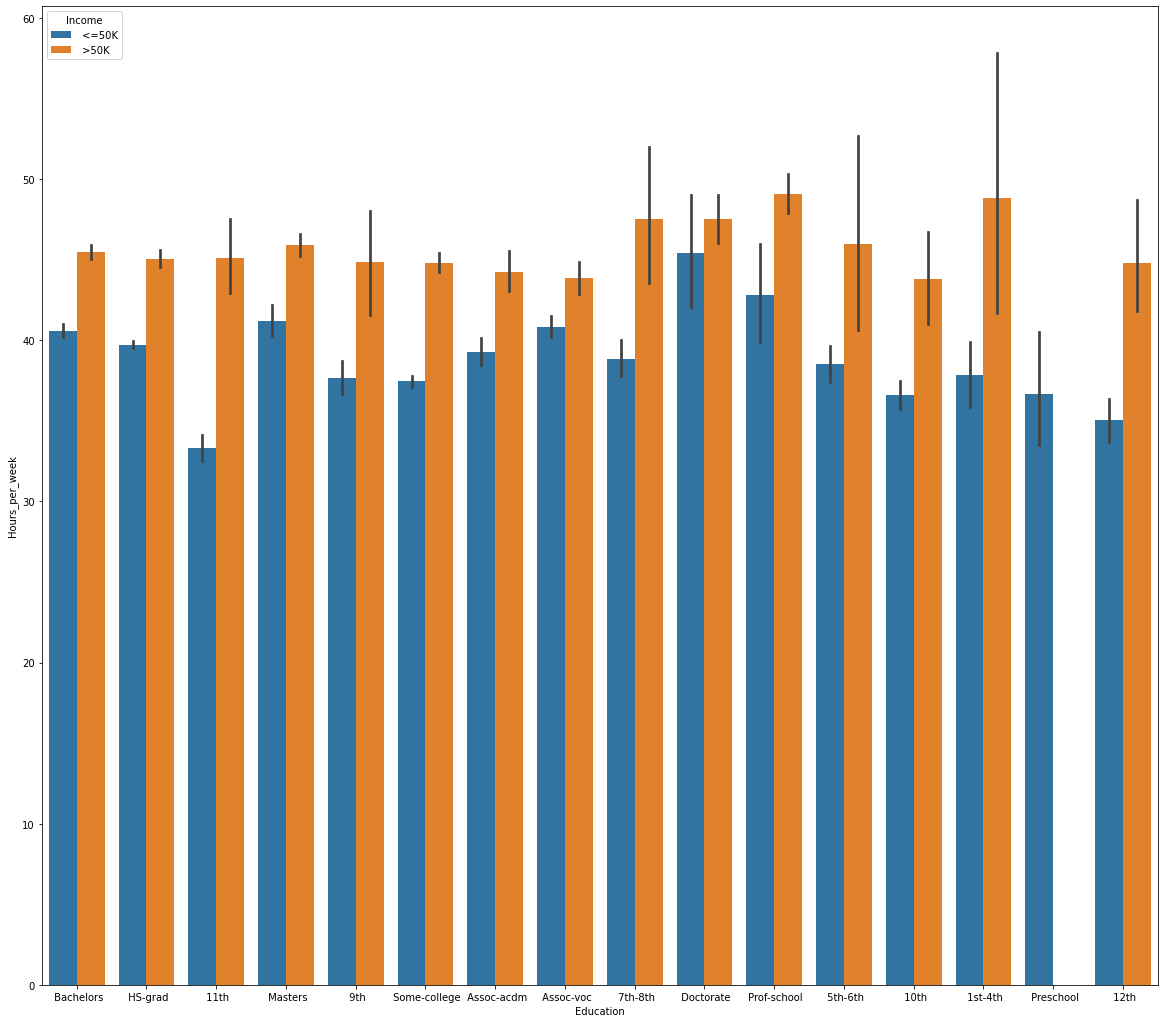

In [26]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Income')

In [ ]:
Education is less means  hourly work time is incresed

# Data Preprocessing & Feature Engineering

In [ ]:
# converting categorical variaable  so we are using pandas get_dummies function to convert into numeric nad variables 'income'and 'sex' columns conerting intp binary using label encoder

In [34]:
le = LabelEncoder() # label encoder

df['Income']=le.fit_transform(df['Income'])
df['Sex']=le.fit_transform(df['Sex'])

#converting 2 columns into binary
df=pd.get_dummies(df,drop_first =True)
pd.set_option('display.max_columns',100)# display all columns

In [35]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Now our almost data values is 0 and 1 except few features like ‘Age’,’Fnlwgt’,’Education_num’,’Hours_per_week’ we can use standard scaler we and convert those features in same scale.

In [40]:
scaler =StandardScaler()

train_col_scale = df[['Age','Fnlwgt','Education_num','Hours_per_week']]

train_scaler_col =scaler.fit_transform(train_col_scale)

train_scaler_col= pd.DataFrame(train_scaler_col,columns=train_col_scale.columns)

In [ ]:
df['Age'] = train_scaler_col['Age']
df['Fnlwgt']=train_scaler_col['Fnlwgt']
df['Education_num']= train_scaler_col['Education_num']
df['Hours_per_week']= train_scaler_col['Hours_per_week']

# Model Building And saving

Now we will train  several mechine Learning models and compare their  results

In [41]:
X = df.drop(['Income'],axis=1)
y = df['Income']

Data is now divided in independent and dependent

In [42]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=11)

now data set divided into train and test. now we will continue with model building

In [47]:
lr = LogisticRegression()
knn= KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb =AdaBoostClassifier()
svm = SVC()
gdboost=GradientBoostingClassifier()

print('Model is  created')


Model is  created


We are using almost 7 models. Now its time to train out model.

In [48]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
print("Model is trained")


Model is trained


In [49]:
# checking accuracy"
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))







Lr classification score 0.796990171990172
knn classification score 0.8316514566514567
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8585907335907336
svm classification score 0.7936556686556686
gdboost classification score 0.8683748683748683


# Model Evaluation

Using confusion matrix in order to evaluate the models accuracy

In [51]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)

using confusion matrix in order to evaluate the models accuracy

In [52]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


In [53]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


In [54]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


In [55]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


In [56]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


In [57]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


In [58]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[7175  237]
 [1741  615]]


Checking classification report for each model

In [ ]:
#classification report for each model

In [59]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      7412
           1       0.72      0.26      0.38      2356

    accuracy                           0.80      9768
   macro avg       0.76      0.61      0.63      9768
weighted avg       0.78      0.80      0.76      9768



In [68]:
knn_report = classification_report(y_test,knn_yprad)
print(" lr classification_report" ,'\n',knn_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      7412
           1       0.57      0.32      0.41      2356

    accuracy                           0.78      9768
   macro avg       0.69      0.62      0.64      9768
weighted avg       0.75      0.78      0.75      9768



In [67]:
dt_report = classification_report(y_test,dt_yprad)
print(" lr classification_report" ,'\n',dt_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7412
           1       0.61      0.63      0.62      2356

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.75      9768
weighted avg       0.81      0.81      0.81      9768



In [66]:
rf_report = classification_report(y_test,rf_yprad)
print(" lr classification_report" ,'\n',rf_report)



 lr classification_report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7412
           1       0.73      0.63      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768



In [73]:
adb_report = classification_report(y_test,adb_yprad)
print(" lr classification_report" ,'\n',adb_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      7412
           1       0.76      0.63      0.69      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



In [72]:
svm_report = classification_report(y_test,svm_yprad)
print(" lr classification_report" ,'\n',svm_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      7412
           1       0.98      0.15      0.26      2356

    accuracy                           0.79      9768
   macro avg       0.88      0.57      0.57      9768
weighted avg       0.83      0.79      0.73      9768



In [70]:
gdboost_report = classification_report(y_test,gdboost_yprad)
print(" lr classification_report" ,'\n',gdboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.80      0.62      0.70      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.81      9768
weighted avg       0.86      0.87      0.86      9768



As our data was imbalanced and in this case we have to consider F1-score and there are 2 models ‘gdboost’,adb” giving the scores above 90% and rest of below 90%. In order to check our model is overfitted or not we are checking the cross validation for 2 models which are giving the scores above 90%.

# ROC AUC Curve

In [80]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [78]:
# importing roc and auc from sklearn and predict the X_test and checking the roc_auc_score

In [82]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))

0.6145302391294987
0.6207169212134317
0.7495440560299135
0.7806452529143306
0.7840265224016117
0.5748673513423376
0.7841933926262831


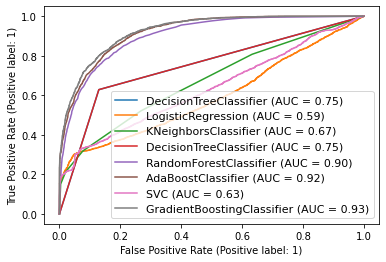

In [84]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')

# K-Fold Cross validation

In [94]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [95]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Mean of Cross validation score for adb  model","=>",cross_val_score(adb,X,y,cv=5).mean())

Mean of Cross validation score for gdboost  model => 0.8658169533169534
Mean of Cross validation score for adb  model => 0.860995085995086


In [104]:
# saving model
import pickle
Census_model = 'Census_model.pickle'
pickle.dump(gdboost,open(Census_model,'wb'))

Concluding Remarks
We started the our project to import various libraries and imported.and copied data base to text file and saved in jypiter note book. Observing the many important points like problem type and how many columns contains int ,float and object values. As per statistic observations we found huge variations among the features and we have used standard scaler to scale the variables. During this process we used seaborn and matplotlib to do the visualizations and converted categorical features into numeric using label encoder and pandas get_dummies function. Afterwards we started training different different machine learning models, picked one of them (gdboost) and applied cross validation on it.
To conclude, There are many other ways also to improve the model accuracy like doing a more extensive feature engineering, finally we saved the best model(gdboost)
